# Neural Nets fundementals 
### making NN models to deal with breast cancer data

In [3]:
import matplotlib.pyplot as plt
from sklearn import datasets
import math

x, y = datasets.make_moons(200, noise=0.20)


In [4]:
x.shape

(200, 2)

we will firist try using the logistic regression to solve the problem and see how well it works 

In [6]:
#spliting data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

let's first try using logistic regression

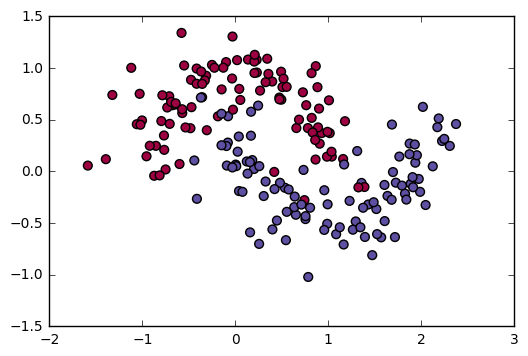

In [8]:
# Train the logistic rgeression classifier
from sklearn.linear_model import LogisticRegressionCV
%matplotlib inline
clf = LogisticRegressionCV()
clf.fit(x_train, y_train)

# Plot the decision boundary
plt.scatter(x[:,0], x[:,1], s=40, c=y, cmap=plt.cm.Spectral)




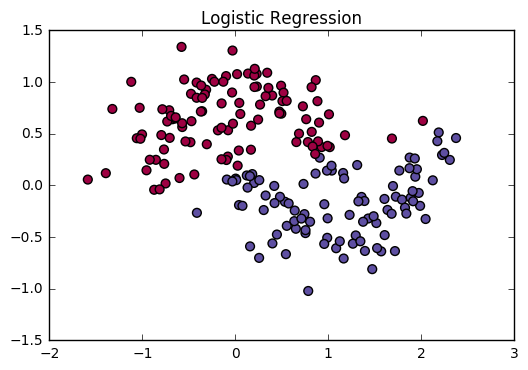

In [10]:
plt.scatter(x[:,0], x[:,1], s=40, c=clf.predict(x), cmap=plt.cm.Spectral)
plt.title("Logistic Regression")



In [11]:
mse = sklearn.metrics.mean_squared_error(y, clf.predict(x))
mse
#mmm not bad :D

0.12

## Let's build our Neural Net from scratch

In [29]:
#setting up the main parameters 
import numpy as np
class NueralNet4Layers(object):
    
    def __init__(self, x, y, num_examples, nn_input_dim, nn_output_dim, epsilon=0.01, reg_lambda=0.01):

        self.num_examples = num_examples # training set size
        self.nn_input_dim = nn_input_dim # input layer dimensionality
        self.nn_output_dim = nn_output_dim # output layer dimensionality
        self.epsilon = epsilon # learning rate for gradient descent
        self.reg_lambda = reg_lambda # regularization strength
        self.x = x #input data
        self.y = y #output data
        self.model = {}
        
    def softmax(self, x):
        '''
        using softmax for the output layer
        '''
        x = np.array(x,dtype=float)

        #if the array was 1 dim
        if len(x.shape) ==1 :
            #normalize it 
            x = x - x.max()
            #calculate the softmax
            x = np.exp(x) / np.sum(np.exp(x))
        else :
            m= np.max(x, axis=1)
            #make it a coulm vector so every row get normalized by it's max
            x -= m.reshape((x.shape[0], 1))
            #calculate the softmax
            x = np.exp(x) / (np.sum(np.exp(x), axis=1)).reshape(x.shape[0], 1)

        return x
    
    def forward_prop(self, x=[]):
        '''
        feed forward process of the neural net
        '''
        if x ==[] :
            x = self.x
        w1, b1, w2, b2, w3, b3 = self.model['w1'], self.model['b1'], self.model['w2'], self.model['b2'],self.model['w3'], self.model['b3']
        # Forward propagation to calculate our predictions
        z1 = x.dot(w1) + b1
        a1 = self.sigmoid(z1)
        z2 = a1.dot(w2) + b2
        a2 = self.sigmoid(z2)
        z3 = a2.dot(w3) + b3
        exp_scores = self.softmax(z3)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        return z1, a1, z2,a2, z3, exp_scores
       
    def sigmoid(self, x):
        """
        Compute the sigmoid function
        """
        s = 1/ (1 + np.exp(-x))
        return s
    
    def sigmoid_grad(self, f): 
        
        '''
        Compute the gradient for the sigmoid function
        '''
        g = f * (1-f)
        return g
    
    def calculate_loss(self):
        
        
        z1, a1, z2,a2, z3, probs = self.forward_prop()
        # Calculating the loss
        corect_logprobs = -np.log(probs[range(self.num_examples), self.y])
        data_loss = np.sum(corect_logprobs)
        
        # Add regulatization term to loss
        w1, w2, w3 = self.model['w1'], self.model['w2'], self.model['w3']
        data_loss += self.reg_lambda/2 * (np.sum(np.square(w1)) + np.sum(np.square(w2)) + np.sum(np.square(w3)))
        
        return 1./self.num_examples * data_loss
    
   
        
    
    def predict(self, x):
        '''
        make the predictions of the NN
        '''
        z1, a1, z2,a2, z3, probs = self.forward_prop(x)
        #print(probs)
        return np.argmax(probs, axis=1)


    # This function learns parameters for the neural network and returns the model.
    # - nn_hdim: Number of nodes in the hidden layer
    # - num_passes: Number of passes through the training data for gradient descent
    # - print_loss: If True, print the loss every 1000 iterations
    def build_model(self, nn_hdim, num_passes=20000, print_loss=False):
        '''
        train the model to calculate the weights and biases
        
        '''

        # Initialize the parameters to random values. We need to learn these.
        np.random.seed(0)
        w1 = np.random.randn(self.nn_input_dim, nn_hdim) / np.sqrt(self.nn_input_dim)
        b1 = np.zeros((1, nn_hdim))
        w2 = np.random.randn(nn_hdim, nn_hdim) / np.sqrt(nn_hdim)
        b2 = np.zeros((1, nn_hdim))
        w3 = np.random.randn(nn_hdim,self.nn_output_dim)/ np.sqrt(nn_hdim)
        b3 = np.zeros((1,self.nn_output_dim ))
        self.model = {'w1': w1, 'b1': b1, 'w2': w2, 'b2': b2, 'w3': w3, 'b3': b3}
        # Gradient descent. For each batch...
        for i in range(0, num_passes):

            # Forward propagation
            z1, a1, z2,a2, z3, probs = self.forward_prop()
   
            # Backpropagation
            delta4 = probs
        
            delta4[range(num_examples), self.y] -= 1
            dw3 = (a2.T).dot(delta4)
            db3 = np.sum(delta4, axis=0, keepdims=True)
            delta3 = delta4.dot(w3.T) * self.sigmoid_grad(a2)
            dw2 = np.dot(a1.T, delta3)
            db2 = np.sum(delta3, axis=0)
            delta2 = delta3.dot(w2.T) * self.sigmoid_grad(a1)
            dw1 = np.dot(self.x.T, delta2)
            db1 = np.sum(delta2, axis=0)

            # Add regularization terms (b1 and b2 don't have regularization terms)
            dw3 += self.reg_lambda * w3
            dw2 += self.reg_lambda * w2
            dw1 += self.reg_lambda * w1

            # Gradient descent parameter update
            w1 += -self.epsilon * dw1
            b1 += -self.epsilon * db1
            w2 += -self.epsilon * dw2
            b2 += -self.epsilon * db2
            w3 += -self.epsilon * dw3
            b3 += -self.epsilon * db3

            # Assign new parameters to the model
            self.model = {'w1': w1, 'b1': b1, 'w2': w2, 'b2': b2, 'w3': w3, 'b3': b3}

            # Optionally print the loss.
            # This is expensive because it uses the whole dataset, so we don't want to do it too often.
            if print_loss and i % 1000 == 0:
                print("Loss after iteration %i: %f" %(i, self.calculate_loss()))

        return self.model

    def calc_mse(self, x, y):
        '''
        calculate the mean square error
        '''
        from sklearn.metrics import mean_squared_error
        error = mean_squared_error(y, self.predict(x))
        return error

## Play with the Neural Network

In [43]:
num_examples = len(x_train) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality
# Gradient descent parameters (I picked these by hand)
epsilon = 0.1 # learning rate for gradient descent
reg_lambda = 0.001 # regularization strength

NN = NueralNet4Layers(x_train, y_train, num_examples, nn_input_dim, nn_output_dim)

In [44]:
NN

In [45]:
NN.build_model(5, print_loss=True)

Loss after iteration 0: 0.786815
Loss after iteration 1000: 0.121857
Loss after iteration 2000: 0.111794
Loss after iteration 3000: 0.104364
Loss after iteration 4000: 0.098512
Loss after iteration 5000: 0.095619
Loss after iteration 6000: 0.094242
Loss after iteration 7000: 0.093456
Loss after iteration 8000: 0.092878
Loss after iteration 9000: 0.092347
Loss after iteration 10000: 0.091756
Loss after iteration 11000: 0.090860
Loss after iteration 12000: 0.088813
Loss after iteration 13000: 0.085176
Loss after iteration 14000: 0.080459
Loss after iteration 15000: 0.076291
Loss after iteration 16000: 0.076877
Loss after iteration 17000: 0.074173
Loss after iteration 18000: 0.071234
Loss after iteration 19000: 0.069477


{'b1': array([[-7.17722582, -3.26114478,  4.8595131 , -2.11277874, -0.9572978 ]]),
 'b2': array([[ 3.14964023, -1.41636058,  0.06722354,  1.95984018, -2.29964204]]),
 'b3': array([[-0.83404254,  0.83404254]]),
 'w1': array([[  5.42386418,   5.77942091,  10.84873776,   1.68172759,
          -0.59843493],
        [ -0.23497282,   6.12728997,   1.03092616, -11.19141752,  -5.4276998 ]]),
 'w2': array([[-3.45671194,  0.89203774, -0.38811005, -3.96675532,  4.81894363],
        [ 4.96255327,  1.64850853,  0.18712891,  2.88747714, -3.61882542],
        [-5.3863497 ,  3.6599843 , -0.69585417, -3.11145555,  3.68012309],
        [-8.81559329, -5.76178935,  0.5449765 ,  2.93397531, -3.22683901],
        [-2.54566977,  0.48333995, -0.36186346, -3.62623961,  4.03663732]]),
 'w3': array([[ 7.75311808, -7.6692018 ],
        [-4.67247056,  4.72179572],
        [ 0.61602811, -0.69777882],
        [ 4.62221494, -4.81141079],
        [-5.40198615,  5.48919965]])}

In [46]:
NN.calc_mse(x,y)

C:\Users\m_ashour\Anaconda3\lib\site-packages\ipykernel\__main__.py:35: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


0.055

C:\Users\m_ashour\Anaconda3\lib\site-packages\ipykernel\__main__.py:35: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


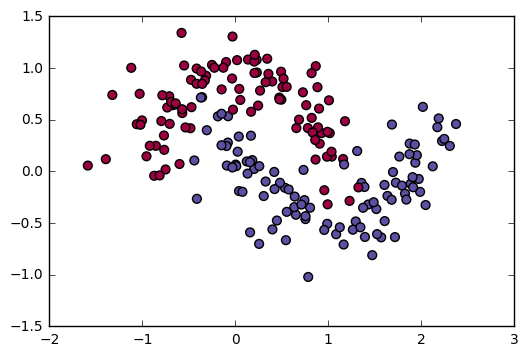

In [48]:
plt.scatter(x[:,0], x[:,1], s=40, c=NN.predict(x), cmap=plt.cm.Spectral)

In [35]:
#print(NN.calc_mse(x_test, y_test))
prediction = NN.predict(x)
for i in range(len(y)):
    print(prediction[i], y[i])

1 1
1 1
1 1
1 1
1 1
0 0
1 0
0 0
1 1
0 0
0 0
0 0
0 0
1 1
0 0
1 1
0 1
0 0
0 0
1 1
0 0
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
0 0
0 0
1 0
1 1
1 1
0 0
0 1
0 0
1 1
1 1
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
1 1
1 1
0 0
0 0
0 0
1 1
1 1
0 0
0 0
1 1
0 0
0 1
0 0
0 0
0 0
0 0
1 1
1 0
1 1
0 0
0 0
1 1
0 0
0 0
1 1
0 0
1 1
0 0
1 1
1 1
0 0
1 1
1 1
1 1
1 1
0 0
0 0
0 0
1 1
1 1
1 1
1 1
0 0
1 1
0 1
0 0
1 1
0 0
1 1
0 0
1 1
0 0
1 0
0 0
0 0
0 0
0 0
1 1
1 1
0 0
0 0
0 0
0 0
1 1
0 0
1 1
0 0
1 1
1 1
0 0
1 1
1 1
0 0
1 1
1 1
1 1
0 0
1 0
0 0
0 0
1 1
0 0
1 1
0 0
0 0
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
0 0
1 1
1 1
1 1
1 1
1 1
0 0
0 0
1 1
0 0
0 0
0 0
1 1
0 0
0 0
1 1
0 0
0 0
1 1
1 1
0 0
1 1
1 1
1 1
0 0
0 0
1 1
0 0
0 0
1 1
0 0
0 0
1 1
1 1
0 0
1 1
0 0
1 1
1 1
0 0
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
0 0
0 0
0 1
0 0
0 0


C:\Users\m_ashour\Anaconda3\lib\site-packages\ipykernel\__main__.py:35: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


In [49]:
#try to increase the number of hidden nodes and see what happens :D
NN.build_model(12)

{'b1': array([[-6.28878083, -1.95691007, -1.975672  , -2.13368971, -2.91588154,
         -2.52468613, -1.60102021, -0.85780058,  1.39220548, -2.01008586,
         -3.6252497 , -4.45505762]]),
 'b2': array([[-0.86315781, -1.904017  , -0.99025853,  0.84101377,  0.44139964,
          0.88324732, -0.29745701, -0.6292184 , -0.64979187,  1.39660954,
         -0.0051067 ,  0.24519592]]),
 'b3': array([[-0.6487881,  0.6487881]]),
 'w1': array([[ 6.48131228, -3.09838035,  1.46422258,  1.5481899 ,  9.85930699,
         -4.19994479,  1.11372065, -1.03687288,  1.52794026,  1.30866028,
         -6.70060414,  3.4468018 ],
        [ 7.60723618,  0.44697604,  1.17678151,  1.27937646,  6.54493453,
          0.5745838 ,  4.75520285, -0.16165925, -6.94268512,  1.79247583,
          0.64354781, -0.76781099]]),
 'w2': array([[ 1.14812755,  3.23462478,  1.35066725, -1.22406056, -0.67072556,
         -1.20140593,  0.31132781, -0.00815558,  0.82549445, -1.99303791,
         -0.39271501, -0.5034541 ],
        

In [37]:
NN.calc_mse(x, y)
#the error decreased:D

C:\Users\m_ashour\Anaconda3\lib\site-packages\ipykernel\__main__.py:35: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


0.050000000000000003

C:\Users\m_ashour\Anaconda3\lib\site-packages\ipykernel\__main__.py:35: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


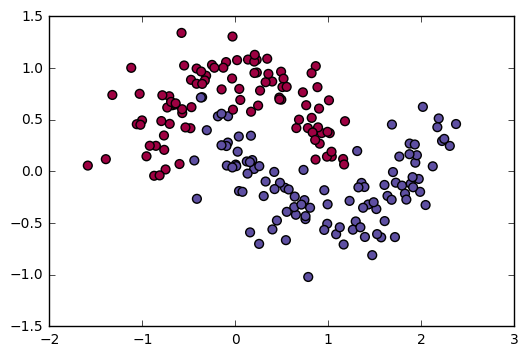

In [50]:
plt.scatter(x[:,0], x[:,1], s=40, c=NN.predict(x), cmap=plt.cm.Spectral)

In [38]:
NN.build_model(20, print_loss=True)

Loss after iteration 0: 0.791559
Loss after iteration 1000: 0.133481
Loss after iteration 2000: 0.115554
Loss after iteration 3000: 0.108085
Loss after iteration 4000: 0.103138
Loss after iteration 5000: 0.099888
Loss after iteration 6000: 0.097646
Loss after iteration 7000: 0.095329
Loss after iteration 8000: 0.093097
Loss after iteration 9000: 0.091271
Loss after iteration 10000: 0.089861
Loss after iteration 11000: 0.088004
Loss after iteration 12000: 0.084711
Loss after iteration 13000: 0.081118
Loss after iteration 14000: 0.078335
Loss after iteration 15000: 0.076433
Loss after iteration 16000: 0.075151
Loss after iteration 17000: 0.074277
Loss after iteration 18000: 0.073674
Loss after iteration 19000: 0.073246


{'b1': array([[-3.08930248, -2.40243547, -2.58521211, -2.8165467 , -3.91231985,
         -0.95329653, -2.45811215, -2.08820332, -3.84635915, -1.31110026,
         -2.24974503, -2.18520482, -3.40757538, -1.98421162, -2.44906743,
         -2.38383586, -5.90294023, -3.08795546, -2.60535399, -2.17203516]]),
 'b2': array([[-0.43903303, -0.44089379, -0.92481113, -0.49873141, -0.47602638,
          2.37840807, -0.95251318,  1.32568441, -1.10816195, -0.37198318,
         -0.53676938, -0.21074367,  1.55875132, -0.47017875,  0.8230486 ,
          1.47672688, -1.2271568 , -0.49365873, -2.73238271, -0.31372537]]),
 'b3': array([[ 0.18366184, -0.18366184]]),
 'w1': array([[  2.35155158,   1.77181961,   1.87447679,   2.21997658,
           9.39709341,  -0.86381728,   1.86805201,  -2.52642625,
          -7.44938613,  -0.70158786,   1.69665785,   1.64570229,
           2.8190465 ,   1.49194374,   1.89162087,   1.79204778,
           6.42180081,  -5.3562264 ,   1.97777494,  -2.75473383],
        [-12.1

In [39]:
NN.calc_mse(x, y)
#seems not a good choice  :D

C:\Users\m_ashour\Anaconda3\lib\site-packages\ipykernel\__main__.py:35: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


0.055

In [40]:
NN.build_model(3, print_loss=True)

Loss after iteration 0: 0.685794
Loss after iteration 1000: 0.122568
Loss after iteration 2000: 0.123613
Loss after iteration 3000: 0.120253
Loss after iteration 4000: 0.103929
Loss after iteration 5000: 0.102179
Loss after iteration 6000: 0.101091
Loss after iteration 7000: 0.100878
Loss after iteration 8000: 0.100592
Loss after iteration 9000: 0.100499
Loss after iteration 10000: 0.100407
Loss after iteration 11000: 0.100321
Loss after iteration 12000: 0.100540
Loss after iteration 13000: 0.101219
Loss after iteration 14000: 0.100013
Loss after iteration 15000: 0.100177
Loss after iteration 16000: 0.100480
Loss after iteration 17000: 0.099956
Loss after iteration 18000: 0.100024
Loss after iteration 19000: 0.100216


{'b1': array([[-2.96993655, -4.6472128 , -1.6277089 ]]),
 'b2': array([[ 2.19208174,  0.88210149, -2.5202485 ]]),
 'b3': array([[ 1.10468746, -1.10468746]]),
 'w1': array([[ 9.00424584, -9.47951047,  1.95534618],
        [ 6.48044884,  0.31591952, -2.00062436]]),
 'w2': array([[-6.09360706, -2.34522221,  3.1593386 ],
        [-5.463646  , -2.63366238,  6.10876568],
        [ 3.52287415,  2.11368402, -4.14003351]]),
 'w3': array([[-5.49148057,  5.63427938],
        [-2.55368282,  2.56211357],
        [ 5.80844789, -6.07463684]])}

In [41]:
NN.calc_mse(x,y)
# the error increased 

C:\Users\m_ashour\Anaconda3\lib\site-packages\ipykernel\__main__.py:35: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


0.059999999999999998

In [42]:
NN.build_model(1, print_loss=True)

Loss after iteration 0: 0.696163
Loss after iteration 1000: 0.267238
Loss after iteration 2000: 0.267178
Loss after iteration 3000: 0.267137
Loss after iteration 4000: 0.267104
Loss after iteration 5000: 0.267078
Loss after iteration 6000: 0.267057
Loss after iteration 7000: 0.267040
Loss after iteration 8000: 0.267025
Loss after iteration 9000: 0.267014
Loss after iteration 10000: 0.267004
Loss after iteration 11000: 0.266997
Loss after iteration 12000: 0.266990
Loss after iteration 13000: 0.266985
Loss after iteration 14000: 0.266981
Loss after iteration 15000: 0.266977
Loss after iteration 16000: 0.266974
Loss after iteration 17000: 0.266972
Loss after iteration 18000: 0.266970
Loss after iteration 19000: 0.266969


{'b1': array([[ 0.62519355]]),
 'b2': array([[-2.67489975]]),
 'b3': array([[ 2.07353613, -2.07353613]]),
 'w1': array([[ 0.64721181],
        [-3.88186546]]),
 'w2': array([[ 5.09406731]]),
 'w3': array([[-3.87402731,  4.42999012]])}

In [28]:
NN.calc_mse(x, y)
#NOOO

C:\Users\m_ashour\Anaconda3\lib\site-packages\ipykernel\__main__.py:35: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


0.155